# Reading the Data Files and Loading the needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_ratings = pd.read_csv('ratings.dat', sep='::', engine='python',names=['UserID','MovieID','Ratings','TimeStamp'])
df_movies = pd.read_csv('movies.dat', sep = '::', engine='python',encoding='latin1',names=['MovieID','MovieName','Category'])
df_users = pd.read_csv('users.dat', sep = '::', engine='python',names=['UserID','Gender','Age','Occupation','Zip-code'])
df_movies.dropna(inplace=True)
df_ratings.dropna(inplace=True)
df_users.dropna(inplace=True)


### Data Analysis

In [3]:
df_ratings.head(1)

,UserID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760


In [4]:
df_movies.head(1)

,MovieID,MovieName,Category
0,1,Toy Story (1995),Animation|Children's|Comedy


In [5]:
df_users.head(1)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067


In [6]:
merged_ratings_users = pd.merge(df_ratings, df_users, on='UserID', how='inner')
df = pd.merge(merged_ratings_users, df_movies, on='MovieID', how='inner')
df.head(1) #the dataframe after merging the tables

,UserID,MovieID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code,MovieName,Category
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


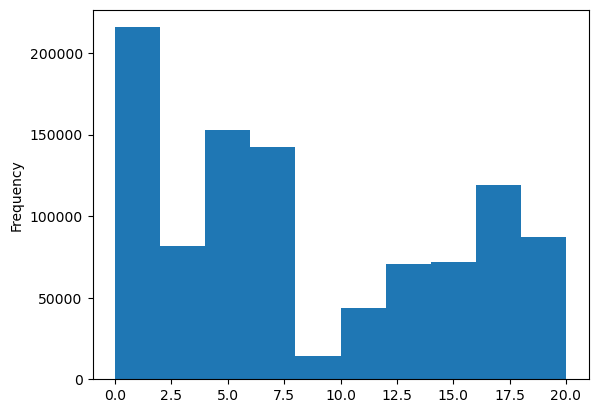

In [7]:
df['Occupation'].plot(kind='hist'); #distribution of the occupation column

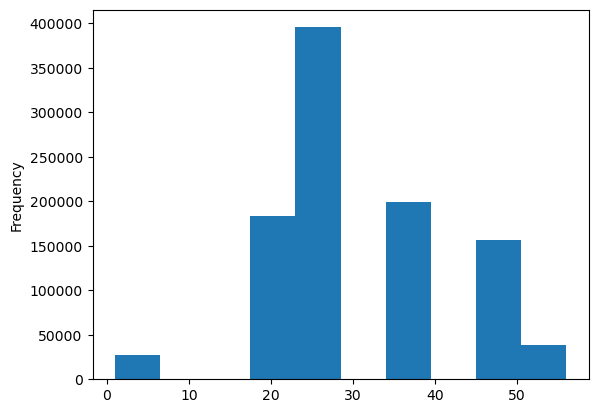

In [8]:
df['Age'].plot(kind='hist');

In [9]:
df.duplicated().sum().sum()

0

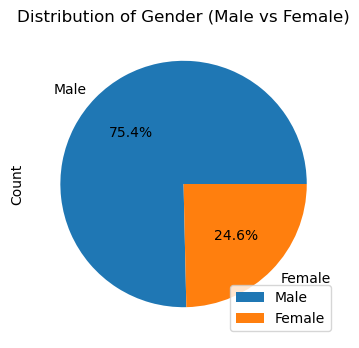

In [10]:
df_m = df['Gender'][df['Gender']=='M']
df_f = df['Gender'][df['Gender']=='F']
m_count = df_m.count()
f_count = df_f.count()
####### visualization
male_count = df_m.count()
female_count = df_f.count()

gender_counts = [male_count, female_count]
gender_labels = ['Male', 'Female']
gender_df = pd.DataFrame({'Gender': gender_labels, 'Count': gender_counts})
ax = gender_df.plot(figsize=(4,4),kind='pie', y='Count', labels=gender_labels,autopct='%1.1f%%')
ax.set_title('Distribution of Gender (Male vs Female)')
plt.show()

In [11]:
df['Category'].nunique()#there are 301 different value 


301

In [12]:
df['Category'].count()

1000209

In [13]:
df['Category']=df['Category'][df['Category'].apply(lambda x :len(x)>20 )]
#as we can see there are crossed values and I think this category feature is a good feature to have so we're going to feature engineer it

In [14]:
df.dropna(inplace=True)
df.head()

,UserID,MovieID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code,MovieName,Category
1725,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
1726,23,661,2,978460739,M,35,0,90049,James and the Giant Peach (1996),Animation|Children's|Musical
1727,49,661,3,977972750,M,18,12,77084,James and the Giant Peach (1996),Animation|Children's|Musical
1728,53,661,5,977979726,M,25,0,96931,James and the Giant Peach (1996),Animation|Children's|Musical
1729,57,661,4,977935511,M,18,19,30350,James and the Giant Peach (1996),Animation|Children's|Musical


In [15]:
df['Category'].count()

235054

In [16]:
df['Category'].nunique() #less now but still too many for us to make it with the one hot method so I have another idea

167

## Feature Engineering for modeling and training 

In [17]:
#the idea is binary features and because we're going to choose the most common categories aka genres we're going to make sure that
#we have as much data as we can without making the model too complex
df['IsDrama'] = df['Category'].apply(lambda x: 1 if 'Drama' in x else 0)
df['IsComedy'] = df['Category'].apply(lambda x: 1 if 'Comedy' in x else 0)
df['IsAction'] = df['Category'].apply(lambda x: 1 if 'Action' in x else 0)
df['IsHorror'] = df['Category'].apply(lambda x: 1 if 'Horror' in x else 0)
df['IsChildren'] = df['Category'].apply(lambda x: 1 if 'Children\'s' in x else 0)
df['IsThriller'] = df['Category'].apply(lambda x: 1 if 'Thriller' in x else 0)
df['IsDocumentary'] = df['Category'].apply(lambda x: 1 if 'Documentary' in x else 0)
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'F' else 1)

In [18]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [19]:
df = df[['Ratings','Gender','Age','Occupation','IsDrama','IsComedy','IsAction','IsHorror','IsChildren','IsThriller','IsDocumentary']]

In [20]:
X=df.iloc[:,1:6]
y=df['Ratings']
y.unique()

array([3, 2, 5, 4, 1], dtype=int64)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [23]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.2556964959746786
